In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
orders=pd.read_csv('/Volumes/DATA/ML/Assignment/Datasets/orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,2,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [3]:
order_products_prior=pd.read_csv('/Volumes/DATA/ML/Assignment/Datasets/order_products__prior.csv')
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [4]:
len(order_products_prior)

32434489

In [5]:
order_products_train=pd.read_csv('/Volumes/DATA/ML/Assignment/Datasets/order_products__train.csv')
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [6]:
len(order_products_train)

1048575

In [7]:
aisles= pd.read_csv('/Volumes/DATA/ML/Assignment/Datasets/aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [8]:
departments=pd.read_csv('/Volumes/DATA/ML/Assignment/Datasets/departments.csv')
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
products=pd.read_csv('/Volumes/DATA/ML/Assignment/Datasets/products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
mergedPriorAndTrain = order_products_prior[:1000000].append(order_products_train)
mergedPriorAndTrain.head()

#merge order_product_train with orders 
mergedOrders = pd.merge(mergedPriorAndTrain, orders, on='order_id', how='left')
df_merged = pd.merge(mergedOrders, products, on='product_id', how='left')
#merging all the datasets to get a final train dataset
df = pd.merge(df_merged, departments, on='department_id', how='left')
df.head()


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department
0,2,33120,1,1,NaN,NaN,NaN,NaN,NaN,NaN,Organic Egg Whites,86,16,dairy eggs
1,2,28985,2,1,NaN,NaN,NaN,NaN,NaN,NaN,Michigan Organic Kale,83,4,produce
2,2,9327,3,0,NaN,NaN,NaN,NaN,NaN,NaN,Garlic Powder,104,13,pantry
3,2,45918,4,1,NaN,NaN,NaN,NaN,NaN,NaN,Coconut Butter,19,13,pantry
4,2,30035,5,0,NaN,NaN,NaN,NaN,NaN,NaN,Natural Sweetener,17,13,pantry


In [11]:
len(df)

2048575

In [12]:
#merge order_product_prior with orders 
merged_reorders = pd.merge(order_products_prior, orders, on='order_id', how='left')
merged_reorders.head()
len(merged_reorders)

32434489

In [13]:
grouped_reorders = merged_reorders.groupby(["order_hour_of_day"])["reordered"].aggregate("count").reset_index()
grouped_reorders

,order_hour_of_day,reordered
0,0.0,66163
1,1.0,34403
2,2.0,20987
3,3.0,15077
4,4.0,16856
5,5.0,26396
6,6.0,87725
7,7.0,275438
8,8.0,530675
9,9.0,750345


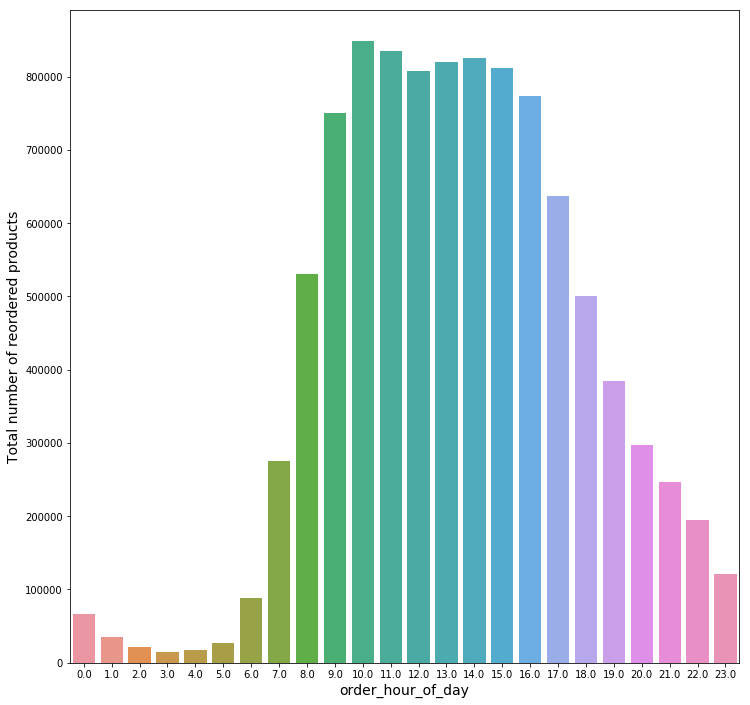

In [14]:
plt.figure(figsize=(12,12))
import seaborn as sns
sns.barplot(grouped_reorders.order_hour_of_day, grouped_reorders.reordered)
plt.ylabel('Total number of reordered products', fontsize=14)
plt.xlabel('order_hour_of_day', fontsize=14)
plt.show()

In [15]:
count_reordered = order_products_train['reordered'].value_counts()
count_reordered

1    627608
0    420967
Name: reordered, dtype: int64

In [16]:
count_reordered = order_products_prior['reordered'].value_counts()
count_reordered

1    19126536
0    13307953
Name: reordered, dtype: int64

In [17]:
del df['eval_set']
del df['add_to_cart_order']
del df['order_number']
del df['product_name']
del df['department']
df.head()


,order_id,product_id,reordered,user_id,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
0,2,33120,1,NaN,NaN,NaN,NaN,86,16
1,2,28985,1,NaN,NaN,NaN,NaN,83,4
2,2,9327,0,NaN,NaN,NaN,NaN,104,13
3,2,45918,1,NaN,NaN,NaN,NaN,19,13
4,2,30035,0,NaN,NaN,NaN,NaN,17,13


In [18]:
len(df)

2048575

In [19]:
df = df[:200000]
count_reordered = df['reordered'].value_counts()
count_reordered

1    118132
0     81868
Name: reordered, dtype: int64

In [20]:
df = df[pd.notnull(df['order_id'])]
df = df[pd.notnull(df['product_id'])]
df = df[pd.notnull(df['user_id'])]
df = df[pd.notnull(df['order_dow'])]
df = df[pd.notnull(df['order_hour_of_day'])]
df = df[pd.notnull(df['aisle_id'])]
df = df[pd.notnull(df['department_id'])]
df['days_since_prior_order'] = df['days_since_prior_order'].replace(np.nan, 0)
y=df['reordered']
del df['reordered']
df.head()

,order_id,product_id,user_id,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
56,6,40462,22352.0,1.0,12.0,30.0,31,7
57,6,15873,22352.0,1.0,12.0,30.0,75,17
58,6,41897,22352.0,1.0,12.0,30.0,101,17
61,8,23423,3107.0,4.0,6.0,17.0,43,3
112,13,17330,45082.0,6.0,17.0,1.0,27,5


In [21]:
len(df)

60494

In [22]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
imputer = imputer.fit(df)
df = imputer.transform(df)
from sklearn.model_selection import train_test_split
Xtr, Xtest, ytr, ytest = train_test_split(df, y, test_size=0.20, random_state=100)
# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
Xtr = sc_X.fit_transform(Xtr)
Xtest = sc_X.transform(Xtest)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nXtr = sc_X.fit_transform(Xtr)\nXtest = sc_X.transform(Xtest)'

In [23]:
################ RandomForestClassifier #####################
from sklearn.ensemble import RandomForestClassifier
clfrf = RandomForestClassifier(max_features="auto", n_estimators=250,min_samples_split=35, 
                               oob_score=False)
clfrf.fit(Xtr, ytr)
#predictions
predrf=clfrf.predict(Xtest)
#accuracy score for the random forest model
from sklearn.metrics import accuracy_score
print("Accuracy Score: ",accuracy_score(ytest,predrf)*100)
print("Report : ",
        classification_report(ytest, predrf))

Accuracy Score:  70.15455822795272
Report :               precision    recall  f1-score   support

          0       0.75      0.42      0.54      4985
          1       0.69      0.90      0.78      7114

avg / total       0.71      0.70      0.68     12099



In [24]:
############Fitting Decision Tree clssification################
from sklearn.tree import DecisionTreeClassifier
giniObject = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=10000, min_samples_leaf=5)
 
# Performing training
giniObject.fit(Xtr, ytr)
predrf=giniObject.predict(Xtest)
print("Accuracy Score: ",accuracy_score(ytest,predrf)*100)
print("Report : ",
        classification_report(ytest, predrf))

Accuracy Score:  64.30283494503678
Report :               precision    recall  f1-score   support

          0       0.57      0.57      0.57      4985
          1       0.70      0.70      0.70      7114

avg / total       0.64      0.64      0.64     12099



In [25]:
################# Entropy##############
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 5000, min_samples_leaf = 2,min_samples_split=75)
# Performing training
clf_entropy.fit(Xtr, ytr)
predrf=clf_entropy.predict(Xtest)
print("Accuracy Score: ",accuracy_score(ytest,predrf)*100)
print("Report : ",
        classification_report(ytest, predrf))

Accuracy Score:  66.22034878915612
Report :               precision    recall  f1-score   support

          0       0.60      0.52      0.56      4985
          1       0.69      0.76      0.73      7114

avg / total       0.66      0.66      0.66     12099

